In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline

In [2]:
customers = pd.read_excel('Customers.xlsx', index_col='CustomerID')
customers.head()

,CustomerType,CustomerName,CustomerState
CustomerID,,,
2142,Individual,Aarika Adlington,North Carolina
2143,Individual,Aaron Homenick,Indiana
2144,Individual,Abba Handman,Florida
2145,Individual,Abbie Leroux,Florida
2146,Business,Abbott Group,Florida


In [3]:
customers.shape

(2361, 3)

In [4]:
customers.index.nunique()

2361

In [5]:
orders = pd.read_excel('Orders.xlsx')
orders.head()

,OrderNum,OrderDate,OrderType,CustomerID,ProductID,Quantity
0,1100948,2017-09-03,Retail,2853,TV810,1
1,1101096,2017-09-24,Wholesale,3557,BP104,10
2,1101138,2017-10-01,Wholesale,4036,DS306,4
3,1101158,2017-10-03,Retail,4377,DS306,1
4,1101181,2017-10-09,Retail,3822,EB507,1


In [6]:
products = pd.read_excel('Products.xlsx')
products.head()

,ProductID,ProductCategory,ProductName,ProductPrice
0,BP101,Blueprints,All Eyes Drone Blueprint,9.99
1,BP102,Blueprints,Bsquare Robot Blueprint,8.99
2,BP104,Blueprints,Cat Robot Blueprint,4.99
3,BP105,Blueprints,Creature Robot Arms Blueprint,12.00
4,BP106,Blueprints,Hexacopter Drone Blueprint,8.99


In [7]:
prod_order = pd.merge(orders, products, on='ProductID')

In [8]:
prod_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 4975
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderNum         4976 non-null   int64         
 1   OrderDate        4976 non-null   datetime64[ns]
 2   OrderType        4976 non-null   object        
 3   CustomerID       4976 non-null   int64         
 4   ProductID        4976 non-null   object        
 5   Quantity         4976 non-null   int64         
 6   ProductCategory  4976 non-null   object        
 7   ProductName      4976 non-null   object        
 8   ProductPrice     4976 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 388.8+ KB


In [9]:
prod_order.head()

,OrderNum,OrderDate,OrderType,CustomerID,ProductID,Quantity,ProductCategory,ProductName,ProductPrice
0,1100948,2017-09-03,Retail,2853,TV810,1,Training Videos,Understanding Automation,44.95
1,1103787,2018-10-17,Retail,3710,TV810,1,Training Videos,Understanding Automation,44.95
2,1103799,2018-10-18,Wholesale,4036,TV810,78,Training Videos,Understanding Automation,44.95
3,1102460,2018-04-14,Wholesale,3551,TV810,9,Training Videos,Understanding Automation,44.95
4,1103930,2018-11-09,Retail,4083,TV810,1,Training Videos,Understanding Automation,44.95


In [10]:
customer_order = pd.merge(orders, customers, on='CustomerID')

In [11]:
customer_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 4975
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderNum       4976 non-null   int64         
 1   OrderDate      4976 non-null   datetime64[ns]
 2   OrderType      4976 non-null   object        
 3   CustomerID     4976 non-null   int64         
 4   ProductID      4976 non-null   object        
 5   Quantity       4976 non-null   int64         
 6   CustomerType   4976 non-null   object        
 7   CustomerName   4976 non-null   object        
 8   CustomerState  4976 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 388.8+ KB


In [12]:
customer_order.head()

,OrderNum,OrderDate,OrderType,CustomerID,ProductID,Quantity,CustomerType,CustomerName,CustomerState
0,1100948,2017-09-03,Retail,2853,TV810,1,Individual,Ewan Ladd,Ohio
1,1101096,2017-09-24,Wholesale,3557,BP104,10,Business,Lockman Group,Kansas
2,1105701,2019-07-30,Wholesale,3557,EB511,11,Business,Lockman Group,Kansas
3,1101938,2018-01-25,Wholesale,3557,RS706,6,Business,Lockman Group,Kansas
4,1103318,2018-08-10,Wholesale,3557,BP104,5,Business,Lockman Group,Kansas


CustomerState
California        384
Florida           375
Texas             370
New York          304
Virginia          187
Georgia           185
Ohio              179
North Carolina    176
Pennsylvania      158
Tennessee         148
dtype: int64


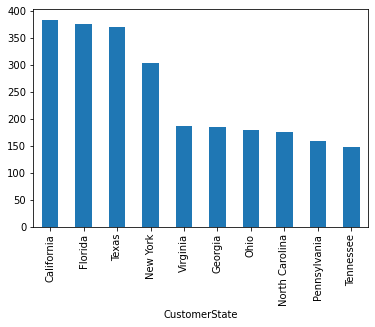

In [13]:
top_10_states = customer_order.groupby('CustomerState').size().sort_values(ascending=False)[:10]
print(top_10_states)
top_10_states.plot(kind='bar');

ProductName
Cat Robot Blueprint          192
BYOR-1500                    152
Building Your First Robot    136
DX-145 Drone                 136
Understanding 3D Printing    128
Ladybug Robot Blueprint      120
Panda Robot Blueprint        120
Photograph Drones            120
Drone Building Essentials    112
Bsquare Robot Blueprint      112
dtype: int64


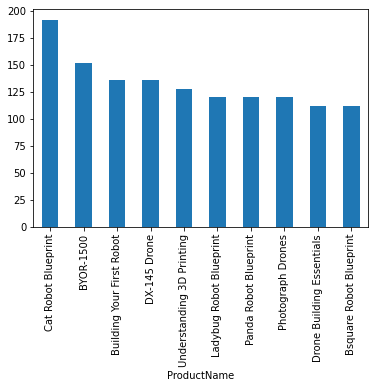

In [14]:
top_10_prod = prod_order.groupby('ProductName').size().sort_values(ascending=False)[:10]
print(top_10_prod)
top_10_prod.plot(kind='bar');

ProductCategory
eBooks             1296
Training Videos     992
Blueprints          912
Drone Kits          552
Robot Kits          480
Drones              408
Robots              336
dtype: int64


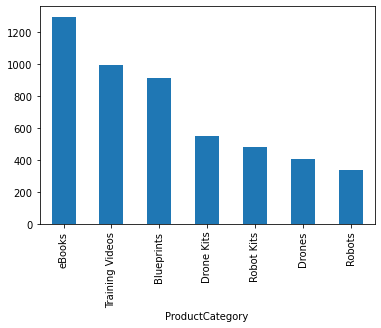

In [15]:
top_10_cat = prod_order.groupby('ProductCategory').size().sort_values(ascending=False)[:10]
print(top_10_cat)
top_10_cat.plot(kind='bar');

In [16]:
orders[orders['Quantity']> orders['Quantity'].median()].sort_values('Quantity', ascending=False)

,OrderNum,OrderDate,OrderType,CustomerID,ProductID,Quantity
1135,1102082,2018-02-16,Retail,4413,EB514,109
1821,1105716,2019-07-31,Wholesale,4464,EB521,109
3021,1104177,2018-12-15,Wholesale,4227,DK201,109
246,1102345,2018-03-28,Wholesale,3274,RK602,109
559,1101150,2017-10-02,Wholesale,4346,TV813,109
...,...,...,...,...,...,...
1378,1103644,2018-09-25,Wholesale,3551,EB519,6
4460,1102492,2018-04-19,Wholesale,3965,DK206,6
535,1105453,2019-06-21,Wholesale,2304,BP107,6
3691,1105125,2019-05-04,Wholesale,4117,TV811,6


In [17]:
orders['Quantity'].describe()

count    4976.000000
mean       11.107516
std        20.367634
min         1.000000
25%         1.000000
50%         5.000000
75%        10.000000
max       109.000000
Name: Quantity, dtype: float64